In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



In [2]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
%%time
history = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 5s 6ms/step - loss: 0.5161 - accuracy: 0.8206 - val_loss: 0.4074 - val_accuracy: 0.8548
Epoch 2/50
480/480 [==============================] - 2s 5ms/step - loss: 0.3844 - accuracy: 0.8620 - val_loss: 0.3662 - val_accuracy: 0.8673
Epoch 3/50
480/480 [==============================] - 2s 4ms/step - loss: 0.3406 - accuracy: 0.8768 - val_loss: 0.3643 - val_accuracy: 0.8686
Epoch 4/50
480/480 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.8854 - val_loss: 0.3599 - val_accuracy: 0.8643
Epoch 5/50
480/480 [==============================] - 2s 3ms/step - loss: 0.2947 - accuracy: 0.8907 - val_loss: 0.3303 - val_accuracy: 0.8801
Epoch 6/50
480/480 [==============================] - 2s 3ms/step - loss: 0.2756 - accuracy: 0.8979 - val_loss: 0.3183 - val_accuracy: 0.8816
Epoch 7/50
480/480 [==============================] - 2s 3ms/step - loss: 0.2599 - accuracy: 0.9036 - val_loss: 0.3073 - val_accuracy: 0.8895
Epoch 

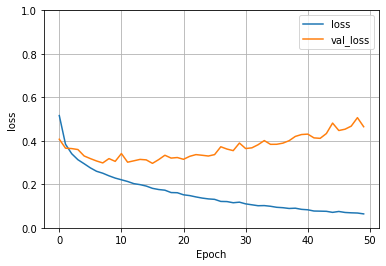

In [4]:
import matplotlib.pyplot as plt

def plot_history(history, value: str = 'loss', limit = None):
    
    if limit:
        if isinstance(limit, int):
            limit_low = None
            limit_high = limit
        elif len(limit) > 1:
            limit_low, limit_high = limit
    else:
        limit_low = None
        limit_high = None

    plt.plot(history.history[value][limit_low:limit_high], label='loss')
    plt.plot(history.history[f'val_{value}'][limit_low:limit_high], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel(value)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history)

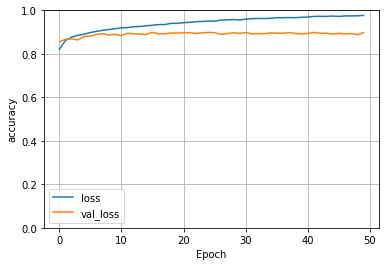

In [5]:
plot_history(history, 'accuracy')

In [6]:
tf.keras.backend.clear_session()

model_l2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_l2.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
%%time
history_l2 = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=1)

Epoch 1/50
480/480 [==============================] - 2s 3ms/step - loss: 0.0642 - accuracy: 0.9768 - val_loss: 0.5224 - val_accuracy: 0.8887
Epoch 2/50
480/480 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.9775 - val_loss: 0.4798 - val_accuracy: 0.8957
Epoch 3/50
480/480 [==============================] - 2s 3ms/step - loss: 0.0627 - accuracy: 0.9760 - val_loss: 0.4776 - val_accuracy: 0.8934
Epoch 4/50
480/480 [==============================] - 2s 3ms/step - loss: 0.0595 - accuracy: 0.9779 - val_loss: 0.4912 - val_accuracy: 0.8965
Epoch 5/50
480/480 [==============================] - 2s 4ms/step - loss: 0.0541 - accuracy: 0.9803 - val_loss: 0.4943 - val_accuracy: 0.8954
Epoch 6/50
480/480 [==============================] - 2s 4ms/step - loss: 0.0566 - accuracy: 0.9793 - val_loss: 0.4974 - val_accuracy: 0.8951
Epoch 7/50
480/480 [==============================] - 2s 3ms/step - loss: 0.0560 - accuracy: 0.9799 - val_loss: 0.5100 - val_accuracy: 0.8902
Epoch 

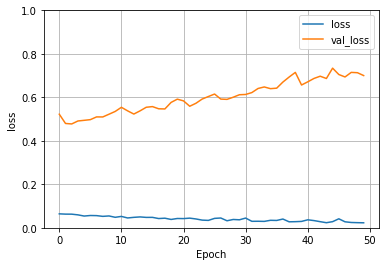

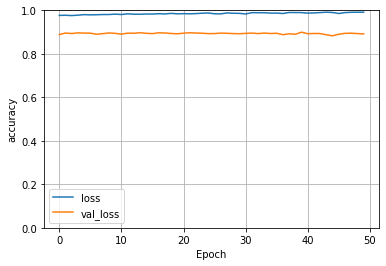

In [8]:
plot_history(history_l2)
plot_history(history_l2, 'accuracy')

In [9]:
tf.keras.backend.clear_session()

model_dr = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_dr.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
%%time
history_dr = model_dr.fit(x_train, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=1)

Epoch 1/50
480/480 [==============================] - 2s 3ms/step - loss: 0.9474 - accuracy: 0.7836 - val_loss: 0.6778 - val_accuracy: 0.8366
Epoch 2/50
480/480 [==============================] - 2s 3ms/step - loss: 0.6493 - accuracy: 0.8292 - val_loss: 0.5827 - val_accuracy: 0.8451
Epoch 3/50
480/480 [==============================] - 2s 4ms/step - loss: 0.5906 - accuracy: 0.8325 - val_loss: 0.5391 - val_accuracy: 0.8491
Epoch 4/50
480/480 [==============================] - 2s 4ms/step - loss: 0.5626 - accuracy: 0.8366 - val_loss: 0.5220 - val_accuracy: 0.8492
Epoch 5/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5517 - accuracy: 0.8378 - val_loss: 0.5174 - val_accuracy: 0.8484
Epoch 6/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5452 - accuracy: 0.8395 - val_loss: 0.4954 - val_accuracy: 0.8567
Epoch 7/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5420 - accuracy: 0.8387 - val_loss: 0.5134 - val_accuracy: 0.8416
Epoch 

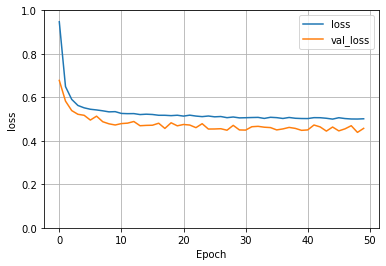

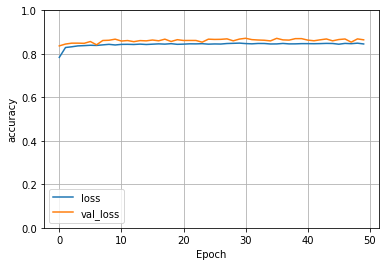

In [11]:
plot_history(history_dr, limit=50)
plot_history(history_dr, 'accuracy', limit=50)

In [12]:
tf.keras.backend.clear_session()

model_c = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_c.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
%%time
history_c = model_c.fit(x_train, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=1)

Epoch 1/50
480/480 [==============================] - 2s 4ms/step - loss: 0.9439 - accuracy: 0.7853 - val_loss: 0.6667 - val_accuracy: 0.8425
Epoch 2/50
480/480 [==============================] - 2s 3ms/step - loss: 0.6498 - accuracy: 0.8315 - val_loss: 0.5774 - val_accuracy: 0.8449
Epoch 3/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5900 - accuracy: 0.8348 - val_loss: 0.5601 - val_accuracy: 0.8401
Epoch 4/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5614 - accuracy: 0.8363 - val_loss: 0.5075 - val_accuracy: 0.8538
Epoch 5/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5548 - accuracy: 0.8381 - val_loss: 0.5042 - val_accuracy: 0.8562
Epoch 6/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5449 - accuracy: 0.8409 - val_loss: 0.5215 - val_accuracy: 0.8499
Epoch 7/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5432 - accuracy: 0.8397 - val_loss: 0.4883 - val_accuracy: 0.8600
Epoch 

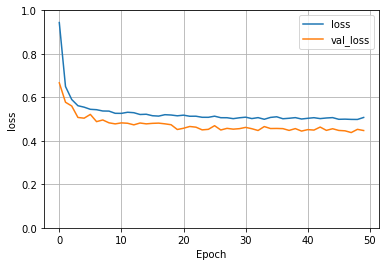

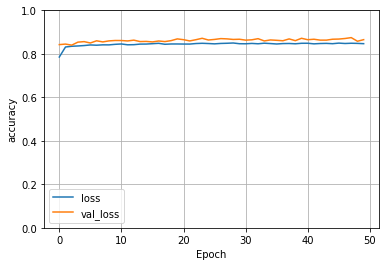

In [14]:
plot_history(history_c, limit=50)
plot_history(history_c, 'accuracy', limit=50)

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.86):
            print("\nReached 86% accuracy on val set so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [16]:
tf.keras.backend.clear_session()

model_call = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_call.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
%%time
history_call = model_call.fit(x_train, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=1, callbacks=[callbacks])

Epoch 1/50
480/480 [==============================] - 2s 4ms/step - loss: 0.9407 - accuracy: 0.7853 - val_loss: 0.6721 - val_accuracy: 0.8357
Epoch 2/50
480/480 [==============================] - 2s 3ms/step - loss: 0.6496 - accuracy: 0.8295 - val_loss: 0.5801 - val_accuracy: 0.8440
Epoch 3/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5830 - accuracy: 0.8369 - val_loss: 0.5189 - val_accuracy: 0.8548
Epoch 4/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5648 - accuracy: 0.8362 - val_loss: 0.5468 - val_accuracy: 0.8390
Epoch 5/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5518 - accuracy: 0.8391 - val_loss: 0.5132 - val_accuracy: 0.8513
Epoch 6/50
478/480 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.8397
Reached 86% accuracy on val set so cancelling training!
480/480 [==============================] - 1s 3ms/step - loss: 0.5461 - accuracy: 0.8396 - val_loss: 0.4865 - val_accuracy: 0.8610
CPU tim

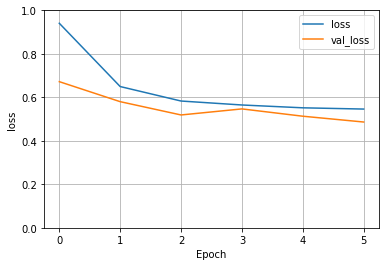

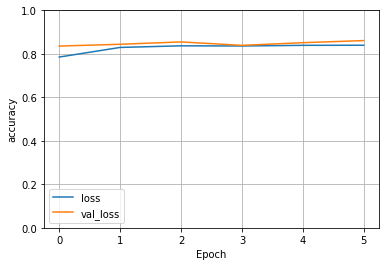

In [18]:
plot_history(history_call, limit=50)
plot_history(history_call, 'accuracy', limit=50)